In [1]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
#Base marcada tópcos
df = pd.read_excel('Topico_dominante_por_frase_snippet.xlsx')
df.head()

Unnamed: 0  Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0           0            0               1              0.5663   
1           1            1               0              0.8600   
2           2            2               6              0.4184   
3           3            3               8              0.5610   
4           4            4               8              0.5112   

                                            Keywords  \
0  venecos, mierda, hijueputa,   , hp, puta, hijo...   
1  venezolano, no, colombia, país,   , colombiano...   
2  veneco, malparido, hpta, puro,   , chiste, mue...   
3  venezolano, no, si, tener, decir, hacer, robar...   
4  venezolano, no, si, tener, decir, hacer, robar...   

                                                Text  
0  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...  
1  @BrianSnow007 @anGspot @iKarlyzr Eso es falso,...  
2           @fabrorejon Vergacion, ya se puso veneco  
3  @Salas91Adrian @Camilousuga11 @SaqueLargoWin A...  
4  Si cuando la generación equivocada la que no l...

In [13]:
df = df.drop(columns = ['Unnamed: 0'])

In [12]:
df.set_index(df['Document_No'],inplace=True)
df

Unnamed: 0  Document_No  Dominant_Topic  Topic_Perc_Contrib  \
Document_No                                                                
0                     0            0               1              0.5663   
1                     1            1               0              0.8600   
2                     2            2               6              0.4184   
3                     3            3               8              0.5610   
4                     4            4               8              0.5112   
...                 ...          ...             ...                 ...   
30430             30430        30430               0              0.5371   
30431             30431        30431               0              0.7610   
30432             30432        30432               0              0.5251   
30433             30433        30433               0              0.2935   
30434             30434        30434               8              0.7244   

                                                      Keywords  \
Document_No                                                      
0            venecos, mierda, hijueputa,   , hp, puta, hijo...   
1            venezolano, no, colombia, país,   , colombiano...   
2            veneco, malparido, hpta, puro,   , chiste, mue...   
3            venezolano, no, si, tener, decir, hacer, robar...   
4            venezolano, no, si, tener, decir, hacer, robar...   
...                                                        ...   
30430        venezolano, no, colombia, país,   , colombiano...   
30431        venezolano, no, colombia, país,   , colombiano...   
30432        venezolano, no, colombia, país,   , colombiano...   
30433        venezolano, no, colombia, país,   , colombiano...   
30434        venezolano, no, si, tener, decir, hacer, robar...   

                                                          Text  
Document_No                                                     
0            @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...  
1            @BrianSnow007 @anGspot @iKarlyzr Eso es falso,...  
2                     @fabrorejon Vergacion, ya se puso veneco  
3            @Salas91Adrian @Camilousuga11 @SaqueLargoWin A...  
4            Si cuando la generación equivocada la que no l...  
...                                                        ...  
30430        No estoy en contra de las ayudas al pueblo Ven...  
30431        Eso sí no permitiré que otra venezolana me lle...  
30432        @NoticiasCaracol Rara vez estoy de acuerdo con...  
30433        @AlbertoBernalLe Además los tm en bgta.llenos ...  
30434        @ActualidadRT @clayito2018 Por algo le Dicen l...  

[30435 rows x 6 columns]

In [14]:
df = df.drop('Document_No',axis= 1 )

In [15]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
df['Clean_Text']=df['Text'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
df['Clean_Text']=df['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
df['Clean_Text']=df['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
df['Clean_Text']=df['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
df['Clean_Text']=df['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
df['Clean_Text']=df['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
df['Clean_Text']=df['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
df['Clean_Text'] = df['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Remover mayúsculas de inicio de texto
df['Clean_Text'] = df['Clean_Text'].map(lambda x: x.lower())
#Autores
df['Clean_Text']=df['Clean_Text'].replace(r'@\w+', '', regex=True)
#Espacios
df['Clean_Text']=df['Clean_Text'].str.strip()
df['Clean_Text']=df['Clean_Text'].replace('Document_No', '')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber'])
#spanish_stopwords.extend(usuarios)
spanish_stopwords.remove('no')
spanish_stopwords.remove('ni')
df['Clean_Text_no_stopwords'] = df['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))

In [16]:
df.head()

Dominant_Topic  Topic_Perc_Contrib  \
Document_No                                       
0                         1              0.5663   
1                         0              0.8600   
2                         6              0.4184   
3                         8              0.5610   
4                         8              0.5112   

                                                      Keywords  \
Document_No                                                      
0            venecos, mierda, hijueputa,   , hp, puta, hijo...   
1            venezolano, no, colombia, país,   , colombiano...   
2            veneco, malparido, hpta, puro,   , chiste, mue...   
3            venezolano, no, si, tener, decir, hacer, robar...   
4            venezolano, no, si, tener, decir, hacer, robar...   

                                                          Text  \
Document_No                                                      
0            @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...   
1            @BrianSnow007 @anGspot @iKarlyzr Eso es falso,...   
2                     @fabrorejon Vergacion, ya se puso veneco   
3            @Salas91Adrian @Camilousuga11 @SaqueLargoWin A...   
4            Si cuando la generación equivocada la que no l...   

                                                    Clean_Text  \
Document_No                                                      
0                            estos venecos hasta en la sopa 👎🤢   
1            eso es falso en venezuela así como en todos lo...   
2                                  vergacion ya se puso veneco   
3                                           aprende venezolano   
4            si cuando la generación equivocada la que no l...   

                                       Clean_Text_no_stopwords  
Document_No                                                     
0                                              venecos sopa 👎🤢  
1            falso venezuela así países xenofobia nacido ve...  
2                                        vergacion puso veneco  
3                                           aprende venezolano  
4            si generación equivocada no gusta ni trabajar ...

In [17]:
lista = df.Dominant_Topic.unique()
lista

array([1, 0, 6, 8, 3, 2, 5, 7, 4], dtype=int64)

In [18]:
series_a_str = str(df["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')

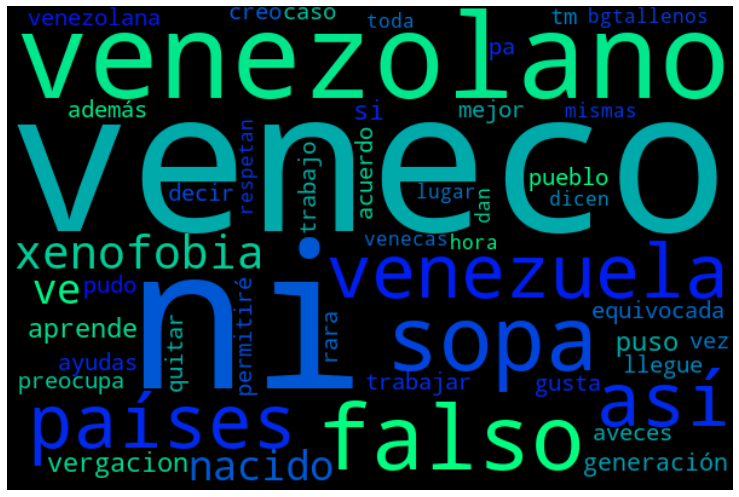

In [19]:
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Estamos en la nube del topico 1
Keywords: venecos, mierda, hijueputa,   , hp, puta, hijo, plaga, maldito, pa
Estamos en la nube del topico 0
Keywords: venezolano, no, colombia, país,   , colombiano, tener, hacer, si, venir
Estamos en la nube del topico 6
Keywords: veneco, malparido, hpta, puro,   , chiste, muerto, :(, infiltrado, fastidiar
Estamos en la nube del topico 8
Keywords: venezolano, no, si, tener, decir, hacer, robar,   , ver, ni
Estamos en la nube del topico 3
Keywords: paro, periodista, coronavirus, realizar, presencia, denunciar, acoger, dictador, muestra, permiso
Estamos en la nube del topico 2
Keywords: trata, joven, ojala, campaña, rápido, excelente, real, plan, valer, minuto
Estamos en la nube del topico 5
Keywords: veneca, hptas, venecas, negro, re, parce, verga, peste, man, mitad
Estamos en la nube del topico 7
Keywords: pedir, plata, vender, limosna, semáforo, vendedor, subir, cobarde, niño, vayan
Estamos en la nube del topico 4
Keywords: 🏻‍, dolar, ecuador, mañana,

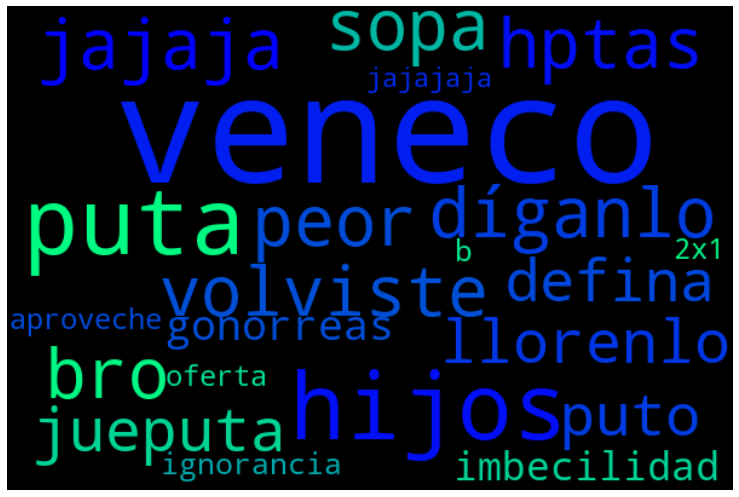

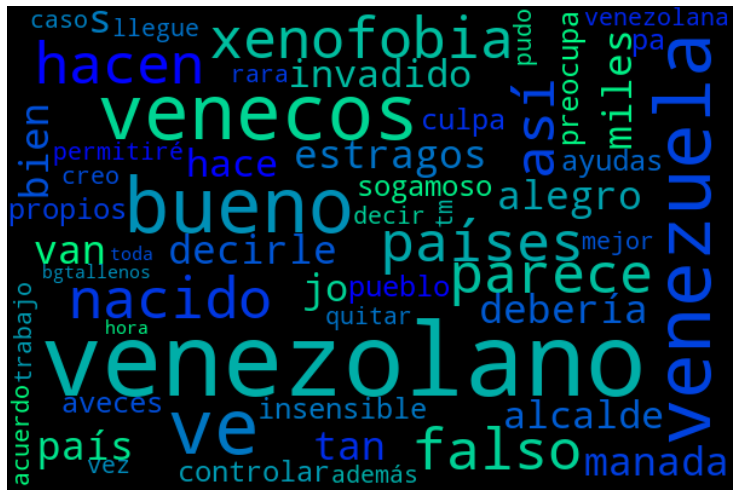

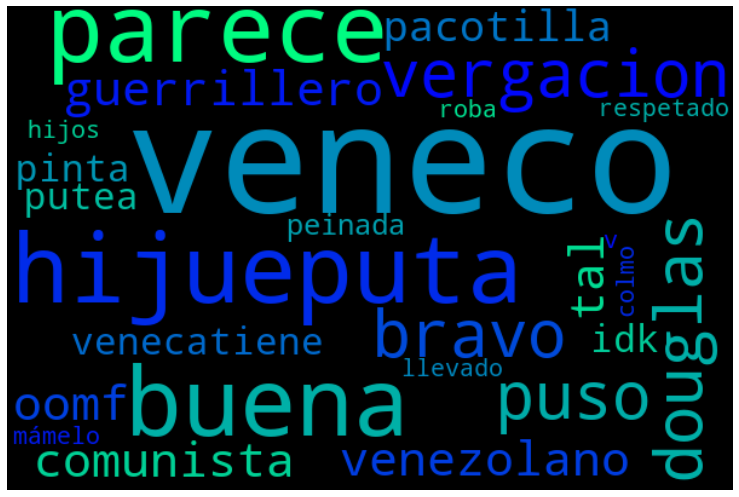

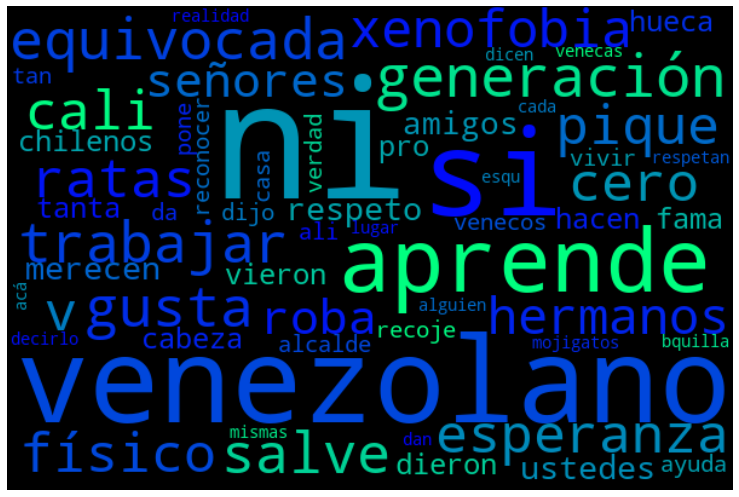

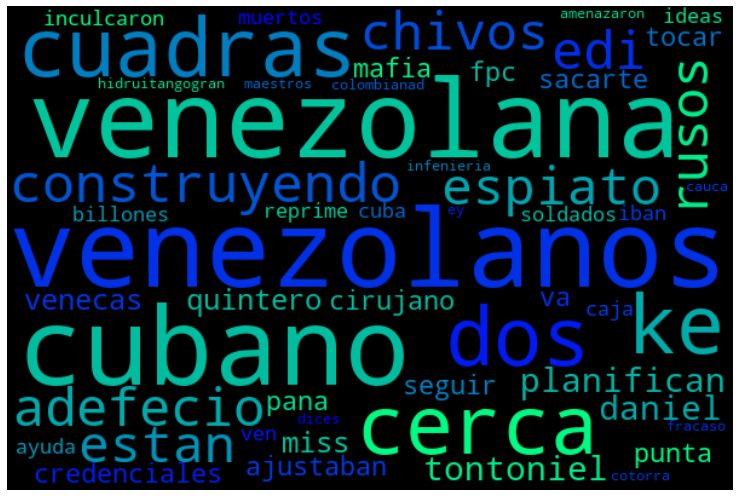

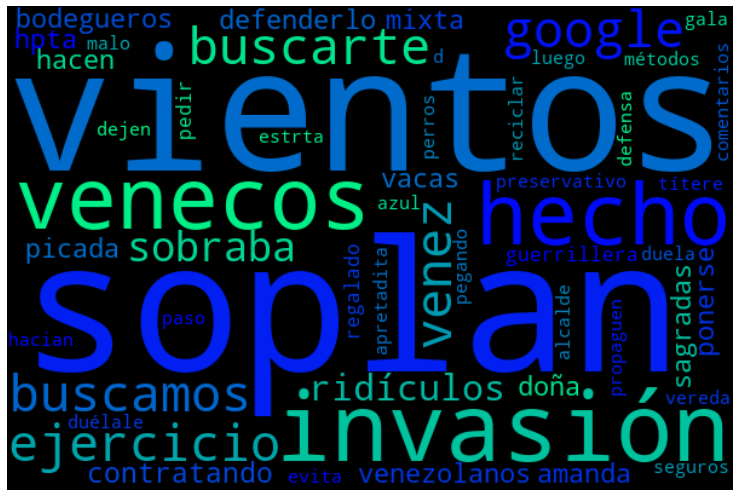

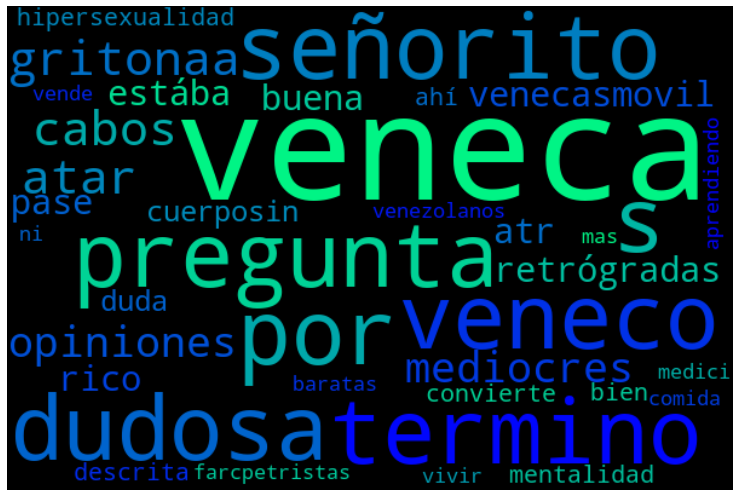

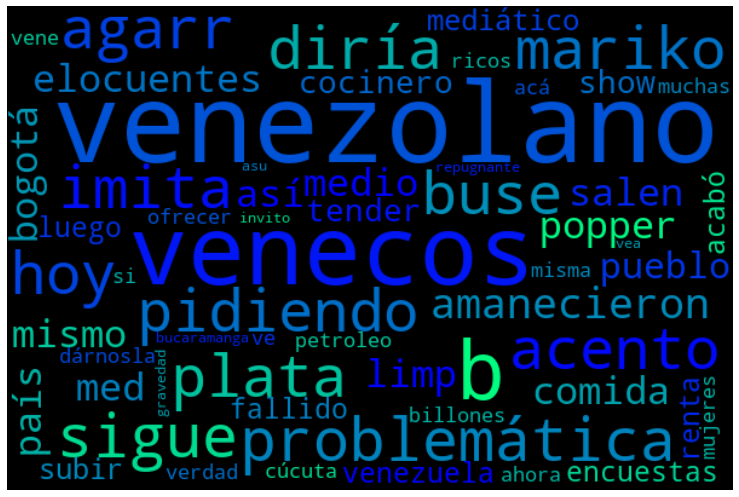

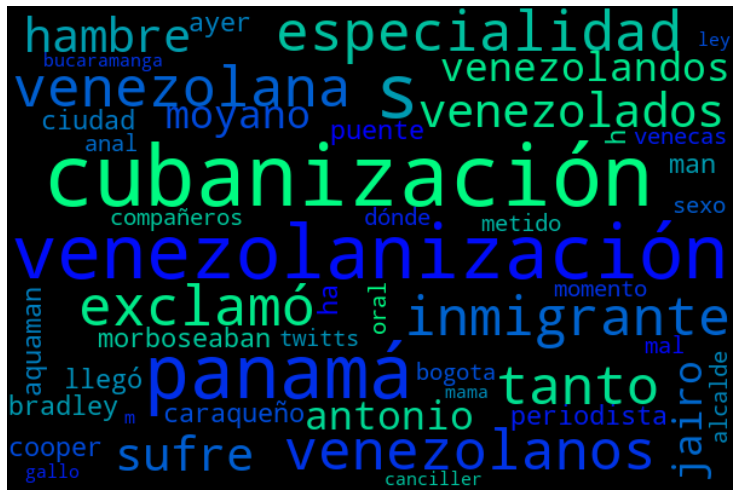

In [20]:
# Nube de palabras general
for topico in lista:
    print('Estamos en la nube del topico ' + str(topico))
    slice_df = df[df['Dominant_Topic'] == topico]
    print("Keywords: " + str(slice_df['Keywords'].iloc[0]))
    series_a_str = str(slice_df["Clean_Text_no_stopwords"])
    series_a_str = series_a_str.replace('Document_No', '')
    series_a_str = series_a_str.replace('dtype', '')
    series_a_str = series_a_str.replace('object', '')
    series_a_str = series_a_str.replace('Name', '')
    series_a_str = series_a_str.replace('Length', '')
    series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')
    cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
    fig=plt.figure(figsize=(13,18))
    plt.axis("off")
    plt.imshow(cloud,interpolation='bilinear')

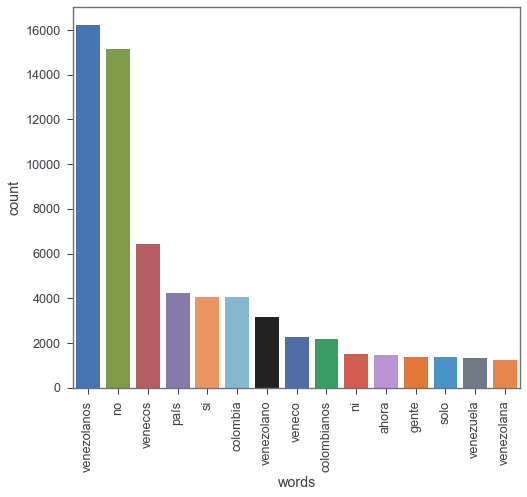

In [21]:
#Contador general
contador = Counter(" ".join(df["Clean_Text_no_stopwords"]).split()).most_common(15)
x_df = pd.DataFrame(contador, columns=("words","count"))
g = sns.barplot(x = 'words', y = 'count', data = x_df)
for item in g.get_xticklabels():
    item.set_rotation(90)

Estamos en la nube del topico 1
Keywords: venecos, mierda, hijueputa,   , hp, puta, hijo, plaga, maldito, pa


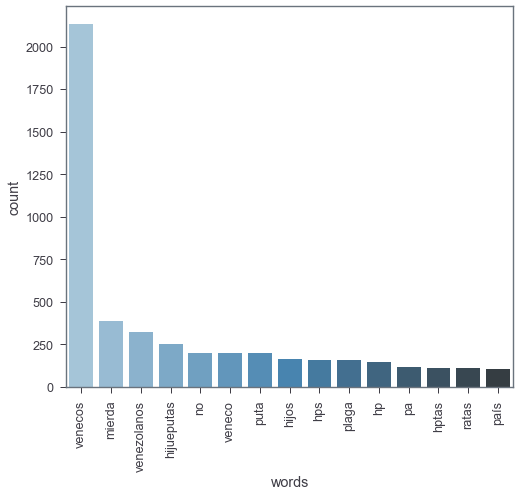

Estamos en la nube del topico 0
Keywords: venezolano, no, colombia, país,   , colombiano, tener, hacer, si, venir


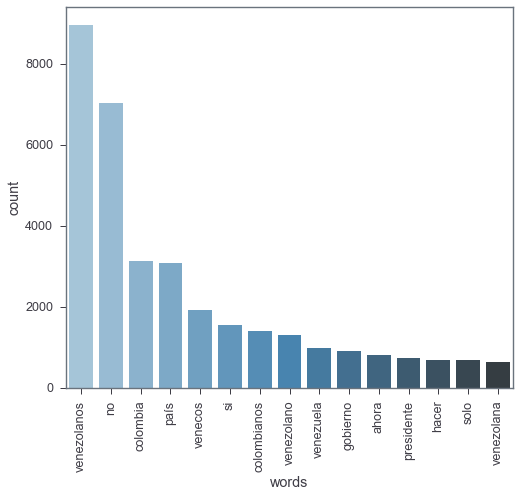

Estamos en la nube del topico 6
Keywords: veneco, malparido, hpta, puro,   , chiste, muerto, :(, infiltrado, fastidiar


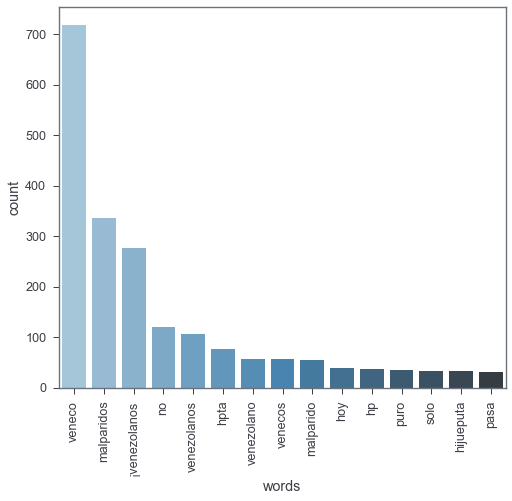

Estamos en la nube del topico 8
Keywords: venezolano, no, si, tener, decir, hacer, robar,   , ver, ni


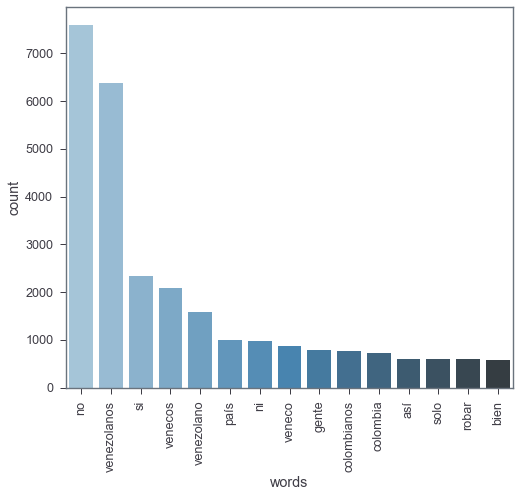

Estamos en la nube del topico 3
Keywords: paro, periodista, coronavirus, realizar, presencia, denunciar, acoger, dictador, muestra, permiso


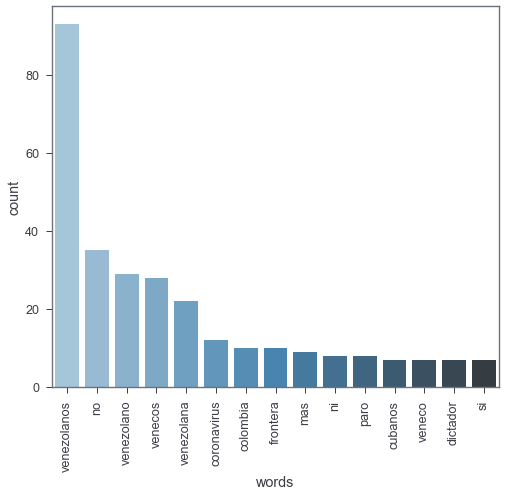

Estamos en la nube del topico 2
Keywords: trata, joven, ojala, campaña, rápido, excelente, real, plan, valer, minuto


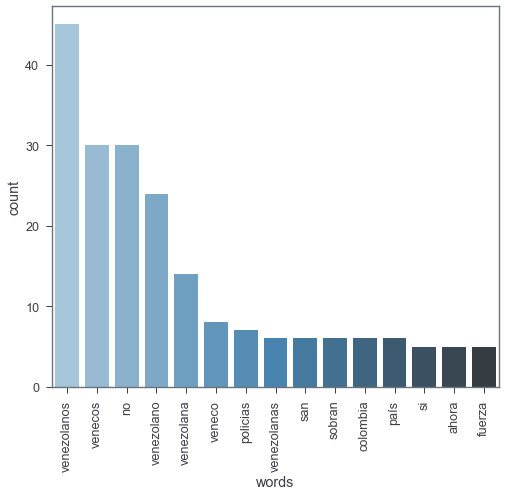

Estamos en la nube del topico 5
Keywords: veneca, hptas, venecas, negro, re, parce, verga, peste, man, mitad


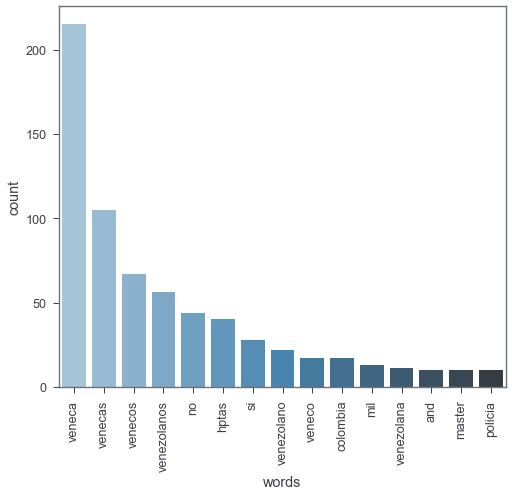

Estamos en la nube del topico 7
Keywords: pedir, plata, vender, limosna, semáforo, vendedor, subir, cobarde, niño, vayan


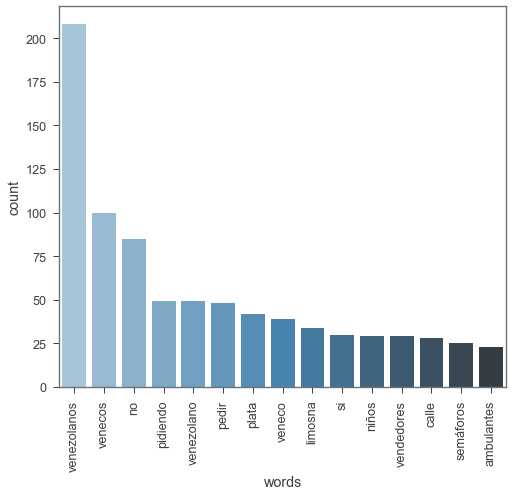

Estamos en la nube del topico 4
Keywords: 🏻‍, dolar, ecuador, mañana, ignorante, metido, mamar, perú, cansar, dolor


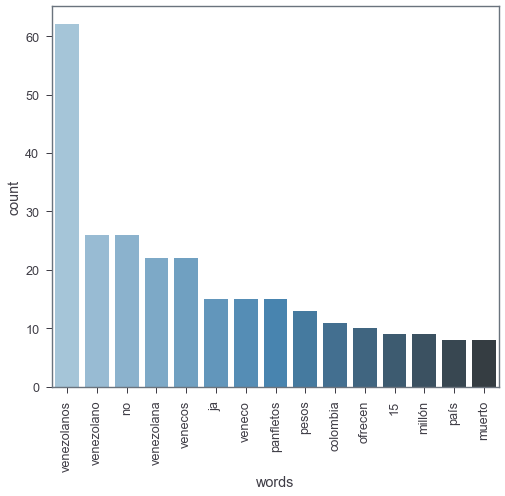

In [23]:
for topico in lista:
    print('Estamos en la nube del topico ' + str(topico))
    slice_df = df[df['Dominant_Topic'] == topico]
    print("Keywords: " + str(slice_df['Keywords'].iloc[0]))
    contador = Counter(" ".join(slice_df["Clean_Text_no_stopwords"]).split()).most_common(15)
    x_df = pd.DataFrame(contador, columns=("words","count"))
    g = sns.barplot(x = 'words', y = 'count', data = x_df, palette = 'Blues_d')
    for item in g.get_xticklabels():
        item.set_rotation(90)
    plt.show()